In [109]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [110]:
#loading dataset
covid_df = pd.read_csv("covid_19_india.csv")

In [111]:
# top 5 rows
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [112]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [113]:
# basic statistic
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [114]:
#chacking for any duplicate values
covid_df.duplicated().sum()

27

In [115]:
# dropping the duplicates values
covid_df.drop_duplicates(inplace=True)

In [116]:
#checking for null values
covid_df.isnull().sum()

Sno                         1
Date                        1
Time                        1
State/UnionTerritory        1
ConfirmedIndianNational     1
ConfirmedForeignNational    1
Cured                       1
Deaths                      1
Confirmed                   1
dtype: int64

In [117]:
# dropin the unwanted columns
covid_df.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],inplace=True)

In [118]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [119]:
# Converting Date column from object to date formate
covid_df['Date'] = pd.to_datetime(covid_df['Date'],format='%Y-%m-%d')

In [120]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [121]:
# Active cases
covid_df['active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.sample(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,active_cases
6,2020-02-05,Kerala,0.0,0.0,3.0,3.0
5368,2020-08-19,Uttarakhand,8724.0,164.0,12961.0,4073.0
5614,2020-08-26,Uttar Pradesh,144754.0,3059.0,197388.0,49575.0
2842,2020-06-09,Uttarakhand,714.0,13.0,1411.0,684.0
5729,2020-08-30,Delhi,152922.0,4404.0,171366.0,14040.0
6525,2020-09-21,West Bengal,195972.0,4359.0,225137.0,24806.0
9685,2020-12-20,West Bengal,507070.0,9320.0,534850.0,18460.0
120,2020-03-12,Maharashtra,0.0,0.0,11.0,11.0
11731,2021-02-15,Sikkim,5927.0,135.0,6118.0,56.0
9771,2020-12-23,Jammu and Kashmir,113307.0,1850.0,118803.0,3646.0


In [122]:
# Making pivote table to view statewise case
statewise = pd.pivot_table(covid_df, values=["Confirmed", "Deaths", "Cured"], 
                           index = "State/UnionTerritory",aggfunc = max)

In [123]:
# adding a new column named recovey_rate
statewise["recovey_rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [124]:
# adding a new column named mortality_rate
statewise["mortality_rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [125]:
statewise = statewise.sort_values(by= "Confirmed", ascending = False)

In [126]:
statewise

,Confirmed,Cured,Deaths,recovey_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,5433506.0,4927480.0,83777.0,90.686934,1.541859
Karnataka,2272374.0,1674487.0,22838.0,73.688882,1.005028
Kerala,2200706.0,1846105.0,6612.0,83.886944,0.300449
Tamil Nadu,1664350.0,1403052.0,18369.0,84.300297,1.103674
Uttar Pradesh,1637663.0,1483249.0,18072.0,90.571076,1.103524
Andhra Pradesh,1475372.0,1254291.0,9580.0,85.015237,0.649328
Delhi,1402873.0,1329899.0,22111.0,94.798246,1.576123
West Bengal,1171861.0,1026492.0,13576.0,87.595030,1.158499
Chhattisgarh,925531.0,823113.0,12036.0,88.934136,1.300443


In [127]:
statewise.style.background_gradient(cmap= "plasma")

,Confirmed,Cured,Deaths,recovey_rate,mortality_rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


Darker or more intense colors represent higher values, while lighter colors represent lower values.

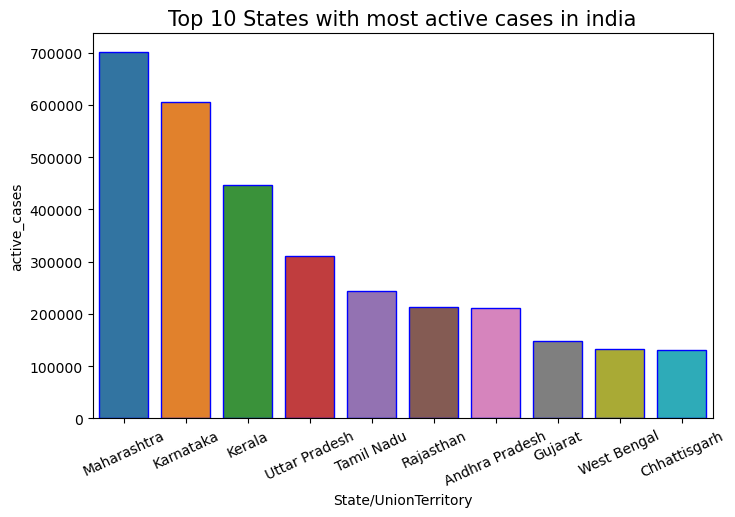

In [128]:
# Top 10 states
top10_active_cases = covid_df.groupby("State/UnionTerritory").max()[['active_cases', 
                'Date']].sort_values(by='active_cases', ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(top10_active_cases.iloc[0:10],y = "active_cases", 
            x = "State/UnionTerritory",linewidth = 1, edgecolor = 'blue')
plt.title("Top 10 States with most active cases in india",size=15)
plt.xticks(rotation=25)
plt.show()

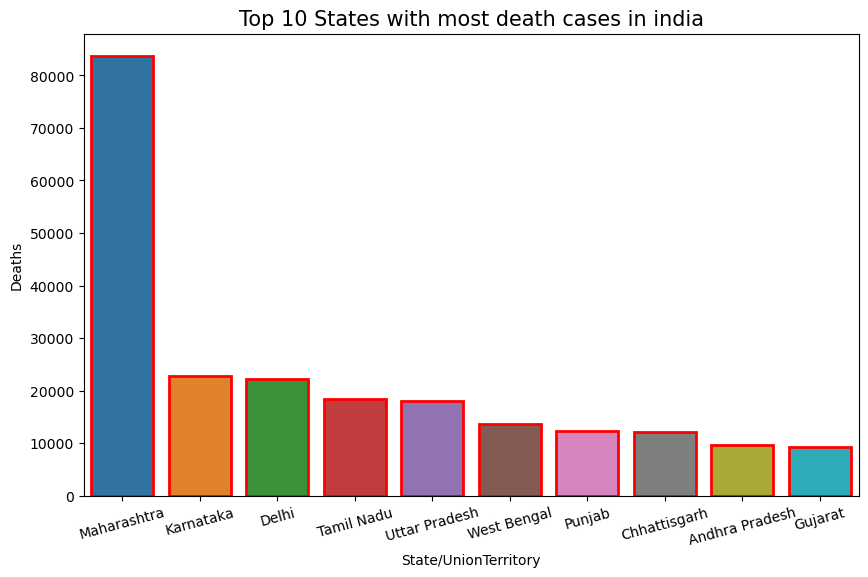

In [129]:
# Top10 death
total_death = covid_df.groupby("State/UnionTerritory").max()[['Deaths','Date']].sort_values(by=['Deaths'], ascending = False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(total_death[0:10], x = 'State/UnionTerritory', y = 'Deaths', linewidth=2, edgecolor='red')
plt.title("Top 10 States with most death cases in india", size=15)
plt.xticks(rotation=15)
plt.show()

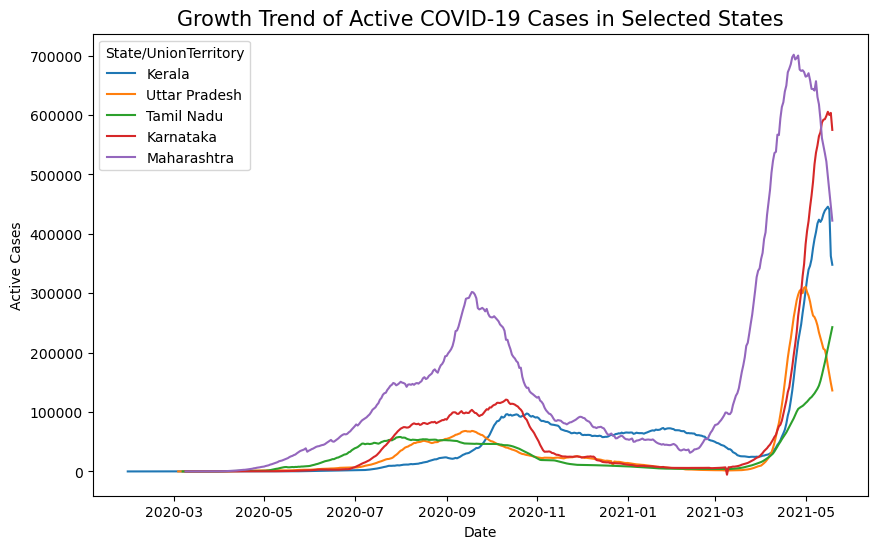

In [130]:
# Create a line plot showing the trend of active COVID-19 cases over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 
                                                                  'Tamil Nadu', 'Kerala', 'Uttar Pradesh'])],
             x='Date', y='active_cases', hue='State/UnionTerritory')
plt.title("Growth Trend of Active COVID-19 Cases in Selected States",size=15)
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.show()

In [131]:
# loading dataset
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [132]:
vaccine_df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Renaming the column
vaccine_df.rename(columns={"Updated On":"Vaccine_Date"}, inplace=True)

In [134]:
# top 5 rows
vaccine_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [151]:
# checking for duplicate values
vaccine_df.duplicated().sum()

0

In [135]:
# checking for missing values
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [136]:
# missing values in terms of %
for col in vaccine_df.columns:
    missing_data = np.round((np.mean(vaccine_df[col].isnull())*100),2)
    print(f"% of missing data in", col, "---", missing_data)

% of missing data in Vaccine_Date --- 0.0
% of missing data in State --- 0.0
% of missing data in Total Doses Administered --- 2.86
% of missing data in Sessions --- 2.86
% of missing data in  Sites  --- 2.86
% of missing data in First Dose Administered --- 2.86
% of missing data in Second Dose Administered --- 2.86
% of missing data in Male (Doses Administered) --- 4.89
% of missing data in Female (Doses Administered) --- 4.89
% of missing data in Transgender (Doses Administered) --- 4.89
% of missing data in  Covaxin (Doses Administered) --- 2.86
% of missing data in CoviShield (Doses Administered) --- 2.86
% of missing data in Sputnik V (Doses Administered) --- 61.82
% of missing data in AEFI --- 30.68
% of missing data in 18-44 Years (Doses Administered) --- 78.3
% of missing data in 45-60 Years (Doses Administered) --- 78.3
% of missing data in 60+ Years (Doses Administered) --- 78.3
% of missing data in 18-44 Years(Individuals Vaccinated) --- 52.42
% of missing data in 45-60 Year

In [137]:
# dropping the unwanted columns
vaccine_df.drop(columns=['First Dose Administered', 'Second Dose Administered', 'Male (Doses Administered)',
                         'Female (Doses Administered)', 'Transgender (Doses Administered)', 'Sputnik V (Doses Administered)',
                         'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
                         '60+ Years (Doses Administered)'], inplace=True)

In [138]:
vaccine_df

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
# dropping the unwanted columns
vaccine_df.drop(columns=[' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)'],inplace=True)

In [140]:
# taking 5 random sample from tha dataset
vaccine_df.sample(5)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
4231,06/08/2021,Lakshadweep,67491.0,7200.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1189,25/05/2021,Bihar,9988331.0,526839.0,2259.0,2161959.0,2862907.0,3213320.0,NaN,NaN,NaN,8240377.0
2148,12/02/2021,Goa,12743.0,357.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,12743.0
6490,25/05/2021,Sikkim,236874.0,10354.0,55.0,29776.0,92180.0,55264.0,NaN,NaN,NaN,177233.0
3378,01/08/2021,Jharkhand,9718188.0,367155.0,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# taking only data where state is not india
Vacc_df = vaccine_df[vaccine_df['State']!='India']

In [142]:
# taking 10 random sample from the dataset
Vacc_df.sample(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
1779,09/04/2021,Dadra and Nagar Haveli and Daman and Diu,67908.0,7100.0,71.0,7504.0,35676.0,15940.0,NaN,NaN,NaN,59130.0
898,07/03/2021,Assam,407866.0,18440.0,1376.0,NaN,NaN,NaN,NaN,NaN,NaN,354572.0
5686,08/07/2021,Odisha,13275073.0,292111.0,816.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,10/02/2021,Andhra Pradesh,286401.0,18589.0,2865.0,NaN,NaN,NaN,NaN,NaN,NaN,286401.0
4514,18/03/2021,Maharashtra,3933965.0,393730.0,2742.0,754715.0,1018705.0,1634460.0,NaN,NaN,NaN,3408977.0
2455,18/05/2021,Gujarat,15086347.0,198700.0,1431.0,1978301.0,5068954.0,4193806.0,NaN,NaN,NaN,11243561.0
3380,03/08/2021,Jharkhand,9873698.0,379932.0,929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,02/05/2021,Delhi,3324902.0,15500.0,122.0,408706.0,1303758.0,900669.0,NaN,NaN,NaN,2613227.0
3893,02/04/2021,Ladakh,55631.0,6900.0,44.0,8716.0,17617.0,22686.0,NaN,NaN,NaN,49045.0
2878,17/05/2021,Himachal Pradesh,2243890.0,71492.0,599.0,120528.0,937413.0,752831.0,NaN,NaN,NaN,1810997.0


In [143]:
# Renaming the column
Vacc_df.rename(columns={'Total Individuals Vaccinated':'Total'},inplace=True)

In [144]:
Vacc_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [145]:
# Top 10 state with high vaccination
max_vacc = Vacc_df.groupby('State')['Total'].sum().to_frame('Total')
max_vacc = max_vacc.sort_values(by='Total',ascending=False).reset_index()
max_vacc = max_vacc[0:10]
max_vacc

,State,Total
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08
5,Karnataka,8.685235e+08
6,Madhya Pradesh,7.718640e+08
7,Bihar,6.608479e+08
8,Kerala,6.208252e+08
9,Andhra Pradesh,5.645911e+08


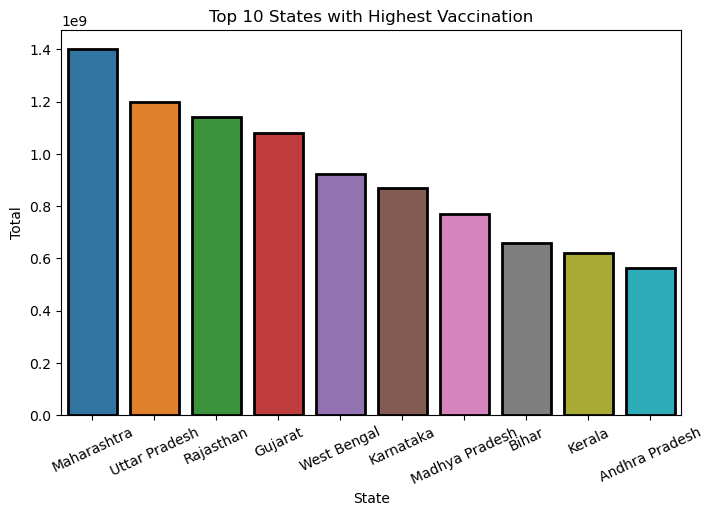

In [146]:
# Top 10 state with high vaccination
plt.figure(figsize=(8,5))
sns.barplot(data=max_vacc,x='State',y='Total',linewidth=2,edgecolor='black')
plt.title('Top 10 States with Highest Vaccination')
plt.xticks(rotation=25)
plt.show()

In [147]:
# Top 10 state with low vaccination
min_vacc = Vacc_df.groupby('State')['Total'].sum().to_frame('Total')
min_vacc = min_vacc.sort_values(by='Total',ascending=True).reset_index()
min_vacc = min_vacc[0:10]
min_vacc

,State,Total
0,Lakshadweep,2124715.0
1,Andaman and Nicobar Islands,8102125.0
2,Ladakh,9466289.0
3,Dadra and Nagar Haveli and Daman and Diu,11358600.0
4,Sikkim,16136752.0
5,Nagaland,17624495.0
6,Puducherry,17760652.0
7,Chandigarh,19731496.0
8,Mizoram,20572453.0
9,Arunachal Pradesh,21081557.0


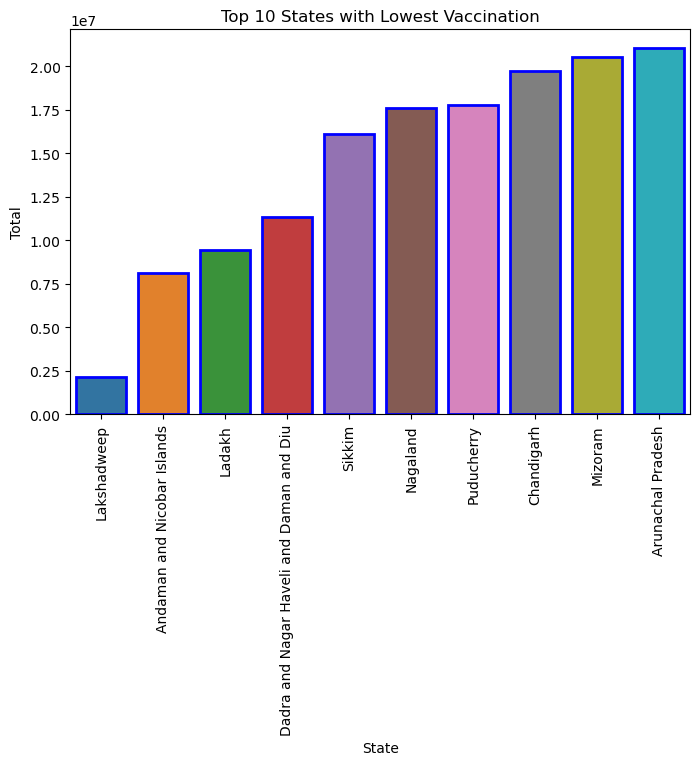

In [148]:
# Top 10 state with low vaccination
plt.figure(figsize=(8,5))
sns.barplot(data=min_vacc,x='State',y='Total',linewidth=2,edgecolor='blue')
plt.title("Top 10 States with Lowest Vaccination")
plt.xticks(rotation=90)
plt.show()

In [149]:
# Men Women vaccination
men_vacc = vaccine_df['Male(Individuals Vaccinated)'].sum()
women_vacc = vaccine_df['Female(Individuals Vaccinated)'].sum()

In [150]:
# Pie chart for men,women and transgen vaccination
px.pie(names=['Men','Women'],values=[men_vacc,women_vacc],title='Men vs Women vaccination')

# Conclusion for COVID-19 Dataset Analysis:

The analysis of the COVID-19 dataset provides valuable insights into the pandemic's impact across different regions and time periods. By examining key metrics, we can draw several important conclusions:

1.The dataset reveals significant differences in the spread and control of COVID-19 across various states and regions. Some states experienced higher peaks in active cases, indicating more severe outbreaks, while others managed to keep the numbers relatively low
    
2.The analysis shows how the pandemic evolved over months, including periods of rapid increase in cases, peaks, and subsequent declines.

3.Vaccination and Recovery Correlation: In regions where vaccination rates were higher, the data may show a faster decline in active cases and lower mortality rates, highlighting the importance of vaccination in controlling the pandemic.

The COVID-19 dataset is a crucial resource for understanding the dynamics of the pandemic, the effectiveness of various interventions, and the challenges faced by different regions. These insights can guide future public health strategies and improve preparedness for potential future outbreaks.        